In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [4]:
data.shape

(506, 13)

In [5]:
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
!pip install xgboost

In [7]:
!pip install lightgbm

In [8]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [10]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

Max_Depth

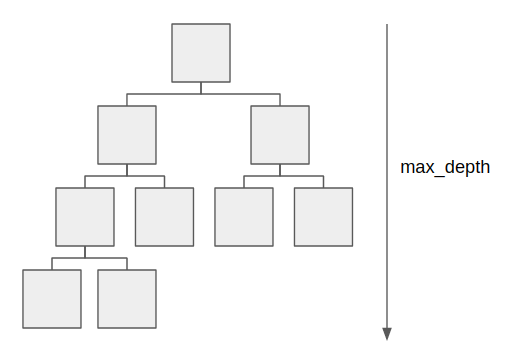

Col_Sample

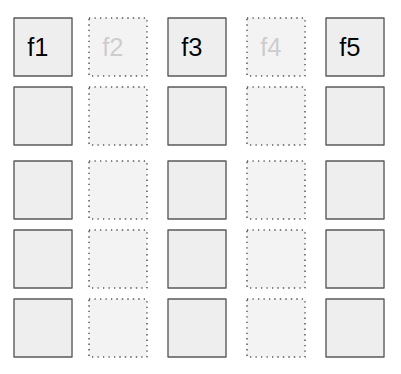

In [11]:
params = {'max_depth' : 30,
         'eta' : 0.1, 
         'colsample_bytree' : 0.8,
         'objective' : 'reg:linear',
         'eval_metric' : 'mae'
         }
num_rounds = 1000
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist,early_stopping_rounds=10)

[06:58:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-mae:19.73	eval-mae:20.4606
Multiple eval metrics have been passed: 'eval-mae' will be used for early stopping.

Will train until eval-mae hasn't improved in 10 rounds.
[1]	train-mae:17.804	eval-mae:18.3993
[2]	train-mae:16.0663	eval-mae:16.5437
[3]	train-mae:14.5029	eval-mae:14.9841
[4]	train-mae:13.0894	eval-mae:13.5038
[5]	train-mae:11.8193	eval-mae:12.1862
[6]	train-mae:10.6805	eval-mae:11.006
[7]	train-mae:9.64635	eval-mae:9.93969
[8]	train-mae:8.71753	eval-mae:9.05455
[9]	train-mae:7.88441	eval-mae:8.22197
[10]	train-mae:7.12883	eval-mae:7.47692
[11]	train-mae:6.44528	eval-mae:6.79378
[12]	train-mae:5.8378	eval-mae:6.25894
[13]	train-mae:5.28759	eval-mae:5.741
[14]	train-mae:4.79225	eval-mae:5.27775
[15]	train-mae:4.35386	eval-mae:4.89411
[16]	train-mae:3.9535	eval-mae:4.572
[17]	train-mae:3.58893	eval-mae:4.25918
[18]	train-mae:3.26779	eval-mae:

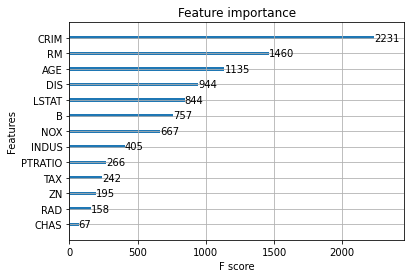

In [12]:
xgb.plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [13]:
# Light GBM dataset
lgb_train = lgb.Dataset(X_train,  y_train)
lgb_test = lgb.Dataset(X_test,  y_test)

# train
params = {'max_depth' : 30,
         'learning_rate' : 0.1, 
          'colsample_bytree' : 0.8,
          'objective': 'regression_l1',
          }

lgb_model = lgb.train(params = params, train_set=lgb_train, num_boost_round=num_rounds, valid_sets=lgb_test,early_stopping_rounds=10)

[1]	valid_0's l1: 6.32985
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's l1: 5.92844
[3]	valid_0's l1: 5.59042
[4]	valid_0's l1: 5.27397
[5]	valid_0's l1: 4.95353
[6]	valid_0's l1: 4.67689
[7]	valid_0's l1: 4.44777
[8]	valid_0's l1: 4.20637
[9]	valid_0's l1: 3.99715
[10]	valid_0's l1: 3.8079
[11]	valid_0's l1: 3.66983
[12]	valid_0's l1: 3.53921
[13]	valid_0's l1: 3.46318
[14]	valid_0's l1: 3.39999
[15]	valid_0's l1: 3.31406
[16]	valid_0's l1: 3.2526
[17]	valid_0's l1: 3.1917
[18]	valid_0's l1: 3.11923
[19]	valid_0's l1: 3.10012
[20]	valid_0's l1: 3.0675
[21]	valid_0's l1: 3.03899
[22]	valid_0's l1: 3.0022
[23]	valid_0's l1: 2.95794
[24]	valid_0's l1: 2.93613
[25]	valid_0's l1: 2.90487
[26]	valid_0's l1: 2.89392
[27]	valid_0's l1: 2.87675
[28]	valid_0's l1: 2.85194
[29]	valid_0's l1: 2.83034
[30]	valid_0's l1: 2.81038
[31]	valid_0's l1: 2.79494
[32]	valid_0's l1: 2.76931
[33]	valid_0's l1: 2.75266
[34]	valid_0's l1: 2.74199
[35]	valid_0's l1: 2.73748
[36]	va

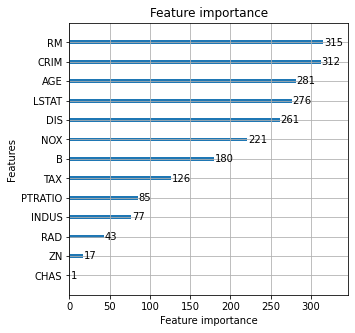

In [14]:
lgb.plot_importance(lgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

덜 중요한 하이퍼파라미터<br>
http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/